In [51]:
# 모듈 불러오기
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import platform
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [52]:
# 코랩 글꼴 설정
%matplotlib inline

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

In [53]:
# 코랩 데이터 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/화재발생 현황(건축구조물)_2021.csv', encoding='cp949')
df.head(10) # 상위 10개의 데이터 살펴보기

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,wrinvstg_no,fire_type_nm,trgtobj_nm,buld_srtfrm,buld_strctr,buld_srtrf,buld_strct_dong_cnt,ground_nof,bstory_cnt,totar,...,vhcle_mnfctur_entrps,fld_fire_se,fld_fire_ign_bhf,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,2.101010e+14,건축/구조물,일반 주택,양식(옥),블록조,스레트가,1.0,1.0,0.0,23.40,...,NaN,NaN,NaN,6.0,NaN,4.3,290,55,NaN,2500
1,2.101010e+14,기타(쓰레기 화재등),수족관 설치 구조물,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.9,NaN,0.7,340,61,NaN,2000
2,2.101050e+14,선박/항공기,어선,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.2,NaN,3.8,360,66,NaN,1747
3,2.101060e+14,건축/구조물,비닐하우스,기타 식,비닐하우스 파이프조,슬라브가,1.0,1.0,0.0,3700.00,...,NaN,NaN,NaN,3.0,NaN,1.7,320,59,NaN,2000
4,2.101070e+14,건축/구조물,NaN,양식(옥),철골철근콘크리트조,슬라브가,1.0,1.0,0.0,16.00,...,NaN,NaN,NaN,-1.6,NaN,8.8,340,74,1.4,967
5,2.101070e+14,건축/구조물,사무실,한식(옥),블록조,스레트가,1.0,1.0,0.0,83.25,...,NaN,NaN,NaN,-1.6,NaN,2.3,320,63,NaN,980
6,2.101080e+14,건축/구조물,보일러실,한식(옥),블록조,스레트가,1.0,1.0,NaN,26.40,...,NaN,NaN,NaN,-1.5,NaN,6.7,320,68,5.9,2000
7,2.101090e+14,자동차/철도차량,차량(스포티지),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,기아,NaN,NaN,-2.1,1.9,7.0,320,91,9.2,163
8,2.101100e+14,기타(쓰레기 화재등),옥외배전반,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,3.7,320,64,4.6,2000
9,2.101100e+14,건축/구조물,비닐하우스(키위묘목),기타 식,비닐하우스 파이프조,비닐하우스,1.0,1.0,NaN,4033.00,...,NaN,NaN,NaN,1.2,NaN,0.9,270,73,1.9,2000


In [54]:
df.index # 전처리를 위한 인덱스 살펴보기
df.columns

Index(['wrinvstg_no', 'fire_type_nm', 'trgtobj_nm', 'buld_srtfrm',
       'buld_strctr', 'buld_srtrf', 'buld_strct_dong_cnt', 'ground_nof',
       'bstory_cnt', 'totar', 'bottom_area', 'buld_sttus_nm',
       'spcify_fgt_trgtobj_nm', 'mnfctur_nation_nm', 'co_nm', 'prduct_nm',
       'prduct_no', 'mnfctur_yr_cl_nm', 'pwrsrc_lclas_nm', 'pwrsrc_sclas_nm',
       'dth_cnt', 'injpsn_cnt', 'dth_hnl_dmge_cnt', 'prprty_dmge_amt',
       'fire_ocrn_yr', 'season_se_nm', 'qtr_se', 'fire_ocrn_ymd',
       'fire_ocrn_tm', 'fire_ocrn_mnth', 'fire_ocrn_day', 'fire_ocrn_hour',
       'fire_ocrn_min', 'daywk', 'frstt_nm', 'ward_nm', 'lfdau_nm', 'rcpt_dt',
       'dsp_dt', 'spt_arvl_dt', 'fsmdem_dt', 'compet_dt', 'hmg_dt',
       'dsp_reqre_time', 'fire_supesn_time', 'sido_nm', 'sigungu_nm', 'emd_nm',
       'cty_frmvl_se_nm', 'emd_se_nm', 'spt_frstt_dist', 'spt_safe_cnter_dist',
       'spt_lfdau_dist', 'ign_htsrc_nm', 'ign_htsrc_sclas_nm',
       'ign_fctr_lclas_nm', 'ign_fctr_sclas_nm', 'frst_igobj_l

In [55]:
# 필요한 열 추출하여 살펴보기
#시도(sido_nm), 시군구(sigungu_nm),화재발생일자(fire_ocrn_ymd), 발화요인(ign_fctr_lclas_nm), 사망자수(dth_cnt), 부상자수(injpsn_cnt), 계절(season_se_nm)
df[['sido_nm', 'sigungu_nm','fire_ocrn_ymd', 'ign_fctr_lclas_nm','dth_cnt','injpsn_cnt', 'season_se_nm']]

,sido_nm,sigungu_nm,fire_ocrn_ymd,ign_fctr_lclas_nm,dth_cnt,injpsn_cnt,season_se_nm
0,제주특별자치도,제주시,20210101,미상,0,0,겨울
1,제주특별자치도,서귀포시,20210101,전기적 요인,0,0,겨울
2,제주특별자치도,제주시,20210105,전기적 요인,0,0,겨울
3,제주특별자치도,서귀포시,20210106,전기적 요인,0,0,겨울
4,제주특별자치도,제주시,20210107,미상,0,0,겨울
...,...,...,...,...,...,...,...
539,제주특별자치도,제주시,20211229,전기적 요인,0,0,겨울
540,제주특별자치도,제주시,20211230,전기적 요인,0,0,겨울
541,제주특별자치도,서귀포시,20211231,전기적 요인,0,0,겨울
542,제주특별자치도,서귀포시,20211231,전기적 요인,0,0,겨울


In [56]:
# 발화요인별 화재발생률
# 발화요인별 합계
df_group = df.groupby('ign_fctr_lclas_nm').size()
df_group

ign_fctr_lclas_nm
가스누출(폭발)      8
교통사고         10
기계적 요인       36
기타           11
미상           66
방화            8
방화의심          8
부주의         196
자연적인 요인      17
전기적 요인      173
제품결함          5
화학적 요인        6
dtype: int64

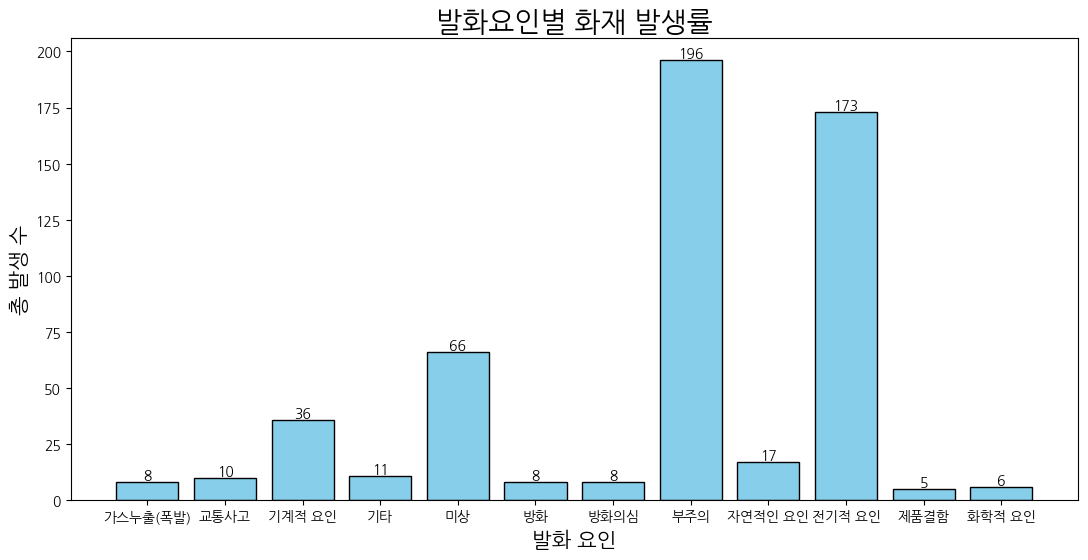

In [57]:
# 발화요인별 화재 발생수 시각화(막대그래프)

plt.figure(figsize = (13,6)) # 그래프 크기 설정
plt.rc('font', family='NanumGothic') # 그래프 글꼴 설정

bars = plt.bar(df_group.index, df_group, color='skyblue', edgecolor='black') # 막대그래프 생성

plt.title('발화요인별 화재 발생률', fontsize=20) # 그래프 제목 설정
plt.ylabel('총 발생 수', fontsize = 15)
plt.xlabel('발화 요인', fontsize = 15)
plt.xticks(rotation='horizontal') # x축 레이블 가로 출력

for bar in bars: # 그래프 위의 정확한 발생 수 표현
  yval=bar.get_height()
  plt.text(bar.get_x()+bar.get_width()/2,yval,int(yval),ha='center',va='bottom')
plt.show()

In [58]:
# 발화요인별 사망자 수 분석
df_group2 = df.groupby('ign_fctr_lclas_nm')['dth_cnt'].sum().reset_index()
# 발화요인별 부상자 수 분석
df_group3=df.groupby('ign_fctr_lclas_nm')['injpsn_cnt'].sum().reset_index()

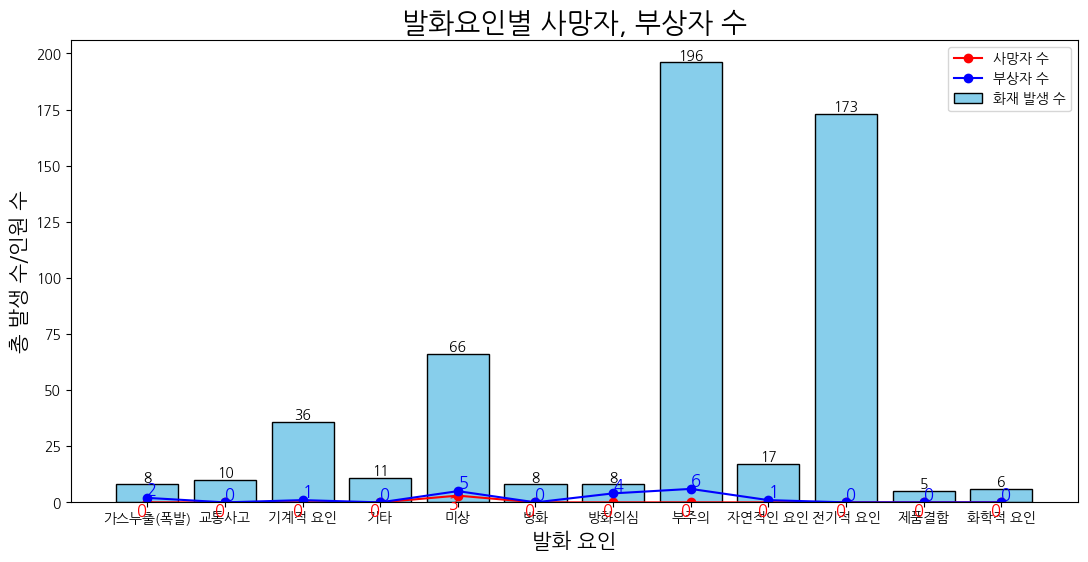

In [59]:
# 발화요인별 사망자,부상자 수 시각화(선그래프 추가)
plt.figure(figsize = (13,6)) # 그래프 크기 설정
plt.rc('font', family='NanumGothic') # 그래프 글꼴 설정

bars = plt.bar(df_group.index, df_group, color='skyblue', edgecolor='black',label='화재 발생 수') # 막대그래프 생성

# 선그래프 생성
plt.plot(df_group2['ign_fctr_lclas_nm'],df_group2['dth_cnt'], marker='o', linestyle='-', color='red', label='사망자 수')
plt.plot(df_group3['ign_fctr_lclas_nm'],df_group3['injpsn_cnt'], marker='o', linestyle='-', color='blue', label='부상자 수')

plt.title('발화요인별 사망자, 부상자 수', fontsize=20) # 그래프 제목 설정
plt.ylabel('총 발생 수/인원 수', fontsize = 15)
plt.xlabel('발화 요인', fontsize = 15)
plt.xticks(rotation='horizontal') # x축 레이블 가로 출력

plt.legend() # 범례 추가

# 막대 그래프 위의 정확한 발생 수 표현
for bar in bars:
  yval=bar.get_height()
  plt.text(bar.get_x()+bar.get_width()/2,yval,int(yval),ha='center',va='bottom')

# 선 그래프 위의 정확한 수 표시
for i, value in enumerate(df_group2['dth_cnt']):
    plt.text(i, value, int(value), ha='right', va='top', color='red', fontsize=12) # 겹치지 않도록 top에 표시

for i, value in enumerate(df_group3['injpsn_cnt']):
    plt.text(i, value, int(value), ha='left', va='bottom', color='blue', fontsize=12) # 겹치지 않도록 bottom에 표시

plt.show()

In [60]:
# 계절과 화재 발생률의 상관 관계 분석
df_group_seasons = df.groupby('season_se_nm').size()
df_group_seasons

season_se_nm
가을    155
겨울    136
봄     144
여름    109
dtype: int64

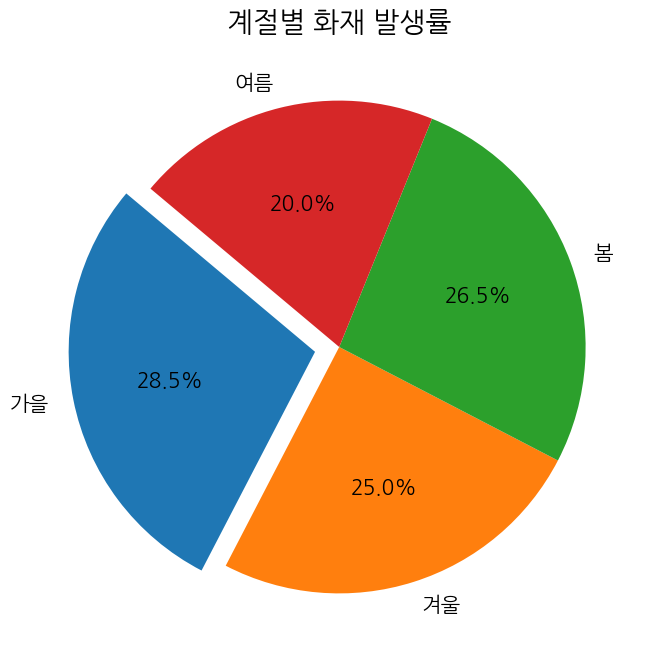

In [61]:
# 계절 별 화재 발생 수 (pie차트)
plt.figure(figsize = (8,8)) # 그래프 크기 설정
plt.rc('font', family='NanumGothic') # 그래프 글꼴 설정

# pie 차트 생성
colors=plt.cm.tab10.colors # tab10 컬러맵 색상 가져오기
explode=(0.1,0,0,0) # 특정부분 띄워내기(가장 높은 값 설정)

plt.pie(df_group_seasons,labels=df_group_seasons.index,autopct='%1.1f%%', startangle=140,
        colors=colors,explode=explode,textprops={'fontsize':15}) # autopct는 백분율 표시 / startangle은 시작 각도 설정

plt.title('계절별 화재 발생률', loc='center',fontsize=20) # 그래프 제목 설정

plt.show()